In [27]:
# Installing necessary modules to use Twitter API.
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.
!pip install git+git://github.com/amueller/word_cloud.git

  Cloning git://github.com/amueller/word_cloud.git to /tmp/pip-tuz34lu2-build


In [28]:
# Setting up keys and secrets for developer's account.
# hidden for safety
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [29]:
# Authorize to access Twitter data.
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [30]:
# Exploring what kinds of tweets come up for the query "sexual assault."
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='#metoo', # `q` is the query, or the words we're searching for.
                        result_type='mixed') # We'll prioritize more popular results first.

In [31]:
# creating file to dump tweets to and array for locations
tweets_file = open('tweet_text.txt','w') 
tweet_locations = []

# collecting tweets and corresponding location
first_tweets = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(1000):  # Then, we'll iterate over the first 10 tweets in `results`...
    first_tweets.append(tweet)     # And we'll add each of those tweets to `first_ten`.
    tweets_file.write(tweet.text)
    tweet_locations.append(tweet.user.location)
        

In [32]:
# check length 
print(len(first_tweets))

1000


In [33]:
import re

# read tweets from file (using txt and not csv for formatting preservation)
tweets_file = open('tweet_texts.txt','r') 
tweet_text = tweets_file.read()
tweets_file.close()

# clean tweet text to leave url components out of wordclouds
tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet_text, flags=re.MULTILINE)
tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet_text, flags=re.MULTILINE)

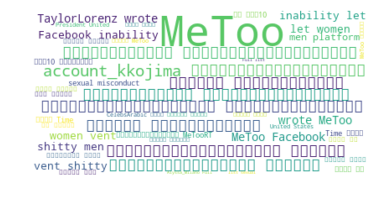

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#generating and formatting of wordcloud from the book text
wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      max_font_size=50, 
                      random_state=42).generate(tweet_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig("total_plot.png")
plt.show()

In [36]:
# testing out a state to ensure self-reported locations are somewhat accurate
for tweet in results.items(500): 
    if ('Maryland' in tweet.user.location):
        print(tweet.user.location)
        

In [37]:
# recording rich states and poor states
rich_states = ['Iowa', 'Nebraska', 'Wisconsin', 'Texas', 'Pennsylvania',
              'Vermont', 'Rhode Island', 'Illinois', 'Wyoming', 'North Dakota',
              'New York', 'Delaware', 'Utah', 'Minnesota', 'Colorado', 
              'Washington', 'California', 'Virginia', 'New Hampshire',
              'Massachusetts', 'Connecticut', 'New Jersey', 'Alaska', 'Hawaii',
              'Maryland']
poor_states = ['Mississippi', 'Arkansas', 'West Virginia', 'Alabama', 'Kentucky',
              'New Mexico', 'Louisiana', 'South Carolina', 'Tennessee', 
              'North Carolina', 'Idaho', 'Oklahoma', 'Florida', 'Montana', 
              'Missouri', 'Indiana', 'Ohio', 'Michigan', 'Georgia', 'Arizona',
              'Maine', 'Nevada', 'South Dakota', 'Kansas', 'Oregon']

In [38]:
# recording tweets for each set of states
rich_tweets_file = open('rich_tweets.txt', 'w')
poor_tweets_file = open('poor_tweets.txt', 'w')

for i in range(len(first_tweets)): 
    curr_text = first_tweets[i].text
    for rich_state in rich_states:
        if (tweet_locations[i] in rich_state):
            rich_tweets_file.write(curr_text)
        else:
            for poor_state in poor_states:
                if (tweet_locations[i] in poor_state):
                    poor_tweets_file.write(curr_text)

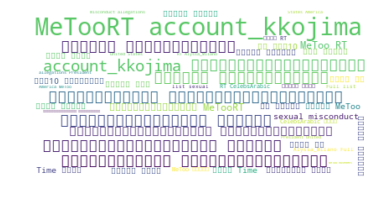

In [39]:
# generating wordcloud
rich_tweets_file = open('rich_tweets.txt','r') 
rich_tweet_text = rich_tweets_file.read()
rich_tweets_file.close()
rich_tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', rich_tweet_text, flags=re.MULTILINE)
rich_tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', rich_tweet_text, flags=re.MULTILINE)

rich_wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      max_font_size=50, 
                      random_state=42).generate(rich_tweet_text) 


plt.imshow(rich_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

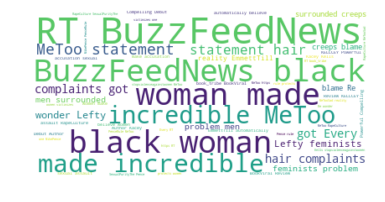

In [40]:
# generating wordcloud
poor_tweets_file = open('poor_tweets.txt','r') 
poor_tweet_text = poor_tweets_file.read()
poor_tweets_file.close()
poor_tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', poor_tweet_text, flags=re.MULTILINE)
poor_tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', poor_tweet_text, flags=re.MULTILINE)

poor_wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      max_font_size=50, 
                      random_state=42).generate(poor_tweet_text) 


plt.imshow(poor_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# recording most educated and least educated states
most_edu_states = ['Nebraska', 'Wisconsin', 'Texas',
              'Vermont', 'Rhode Island', 'Illinois', 'Wyoming', 'North Dakota',
              'New York', 'Delaware', 'Utah', 'Minnesota', 'Colorado', 
              'Washington', 'Virginia', 'New Hampshire',
              'Massachusetts', 'Connecticut', 'New Jersey', 'Alaska', 'Hawaii',
              'Maryland', 'Oregon', 'Kansas', 'Montana', 'Maine']
least_edu_states = ['Mississippi', 'Arkansas', 'West Virginia', 'Alabama', 'Kentucky',
              'New Mexico', 'Louisiana', 'South Carolina', 'Tennessee', 
              'North Carolina', 'Idaho', 'Oklahoma', 'Florida', 
              'Missouri', 'Indiana', 'Ohio', 'Michigan', 'Georgia', 'Arizona',
              'Maine', 'Nevada', 'South Dakota', 'Iowa', 'California', 'Pennsylvania']

In [43]:
# recording tweets for each set of states
most_edu_tweets_file = open('most_edu_tweets.txt', 'w')
least_edu_tweets_file = open('least_edu_tweets.txt', 'w')

for i in range(len(first_tweets)): 
    curr_text = first_tweets[i].text
    for most_edu_state in most_edu_states:
        if (tweet_locations[i] in most_edu_state):
            most_edu_tweets_file.write(curr_text)
        else:
            for least_edu_state in least_edu_states:
                if (tweet_locations[i] in least_edu_state):
                    least_edu_tweets_file.write(curr_text)

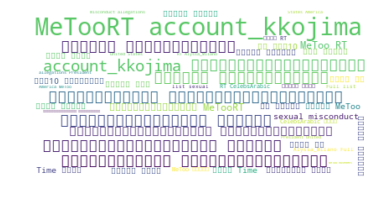

In [45]:
# generating wordcloud
most_edu_tweets_file = open('most_edu_tweets.txt','r') 
most_edu_tweet_text = most_edu_tweets_file.read()
most_edu_tweets_file.close()
most_edu_tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', most_edu_tweet_text, flags=re.MULTILINE)
most_edu_tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', most_edu_tweet_text, flags=re.MULTILINE)

most_edu_wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      max_font_size=50, 
                      random_state=42).generate(most_edu_tweet_text) 


plt.imshow(most_edu_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("most_edu_plot.png")
plt.show()

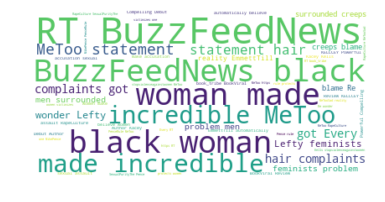

In [47]:
# generating wordlcoud
least_edu_tweets_file = open('least_edu_tweets.txt','r') 
least_edu_tweet_text = least_edu_tweets_file.read()
least_edu_tweets_file.close()
least_edu_tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', least_edu_tweet_text, flags=re.MULTILINE)
least_edu_tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', least_edu_tweet_text, flags=re.MULTILINE)

least_edu_wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      max_font_size=50, 
                      random_state=42).generate(least_edu_tweet_text) 


plt.imshow(least_edu_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("least_edu_plot.png")
plt.show()